# **Reconnaissance Drought Index (RDI)**
**Tolga Barış Terzi – 2025**

This notebook demonstrates example calculations of the **Reconnaissance Drought Index (RDI)**, following the methodology of **Tsakiris and Vangelis (2005)**.  

RDI quantifies meteorological drought by integrating **precipitation (P)** and **potential evapotranspiration (PET)** over a chosen time scale.

---

## **RDI Methodology Overview**

1. **Aggregation**: Accumulate precipitation and PET data over the selected time scale (e.g., 1, 3, 6, 12 months).  
2. **Computation**: Calculate the ratio of accumulated precipitation to accumulated PET:  
   $$
   \alpha = \frac{P}{PET}
   $$  
3. **Normalization**: Compute the **Normalized RDI (RDIₙ)**:  
   $$
   \text{RDI}_n = \frac{\alpha}{\overline{\alpha}} - 1
   $$  
4. **Standardization**: Compute the **Standardized RDI (RDIst)**:  
   $$
   y = \ln(\alpha), \quad \text{RDIst} = \frac{y - \overline{y}}{\sigma_y}
   $$  
5. **Month-wise adjustment (optional)**: Calculate RDI separately for each calendar month to account for seasonal variability.

---

## **Required Packages**

In [1]:
import pandas as pd
import numpy as np
import pydrght

---
## **Load the Data**

The example dataset contains monthly values of:
  
- **Precipitation** 
- **Potential Evapotranspiration**

The data is from the **Seyhan River Basin, Turkey**, covering the period **October 1964 – September 2011**, which corresponds to hydrological years **1965–2011**.

In [3]:
df = pd.read_csv("data.csv", index_col=0, parse_dates=True)
display(df.head())

,STREAMFLOW,PRECIPITATION,MINT,MAXT,MEANT,PET
DATE,,,,,,
1964-10-01,10.5,46.67,2.0,22.7,12.0,95.471
1964-11-01,11.0,99.70,-1.7,12.3,5.0,43.318
1964-12-01,12.5,64.70,-4.1,4.1,-0.4,22.320
1965-01-01,12.3,41.00,-5.0,3.0,-1.4,22.607
1965-02-01,15.8,104.50,-6.9,3.4,-2.1,29.121


---
## **Calculate RDI**

In this example, we calculate monthly **RDI** values using precipitation and PET data.  

- **Precipitation** and **Potential Evapotranspiration (PET)** are selected from the dataset.  

We use the `pydrght.RDI` class to calculate:

1. **Global RDI**: Normalized and standardized RDI over all months combined.  
2. **Month-wise RDI**: Seasonal RDI values computed separately for each calendar month.

=== Global RDI ===


,RDI_normalized,RDI_standardized
DATE,,
1965-09-01,-0.106483,-0.439956
1965-10-01,-0.059134,-0.191028
1965-11-01,-0.116606,-0.494880
1965-12-01,0.033532,0.261825
1966-01-01,0.302538,1.377037


=== Month-wise RDI ===


,RDI_normalized_month,RDI_standardized_month
DATE,,
1965-09-01,-0.106912,-0.426795
1965-10-01,-0.059956,-0.181633
1965-11-01,-0.113810,-0.460418
1965-12-01,0.034193,0.258477
1966-01-01,0.301780,1.329147


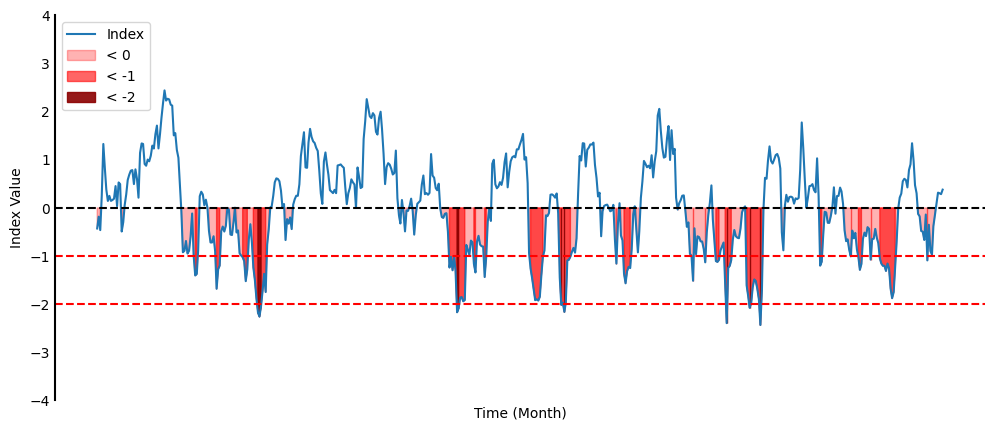

In [6]:
# Select precipitation column
precip = df['PRECIPITATION']
pet = df['PET']

# Initialize RDI class
RDI = pydrght.RDI(precip=precip, pet=pet, ts=12)

# === Global RDI ===
RDI_global = RDI.calculate()
print("=== Global RDI ===")
display(RDI_global.head())

# === Month-wise RDI ===
RDI_monthwise = RDI.calculate_monthwise()
print("=== Month-wise RDI ===")
display(RDI_monthwise.head())

pydrght.utils.plot_index_with_severity(RDI_monthwise["RDI_standardized_month"])


---
## **References**

- Tsakiris, G., & Vangelis, H. (2005). *Establishing a drought index incorporating evapotranspiration.* European Water, 9/10, 3–11.  